In [161]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import preprocess
import tensorflow as tf
import nn_model

In [3]:
data = pd.read_csv('../data/train.csv')

(array([1.51447e+05, 5.64800e+03, 1.53200e+03, 8.66000e+02, 5.10000e+01,
        1.90000e+01, 5.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00]),
 array([1.0000e+00, 2.2820e+02, 4.5540e+02, 6.8260e+02, 9.0980e+02,
        1.1370e+03, 1.3642e+03, 1.5914e+03, 1.8186e+03, 2.0458e+03,
        2.2730e+03]),
 <a list of 10 Patch objects>)

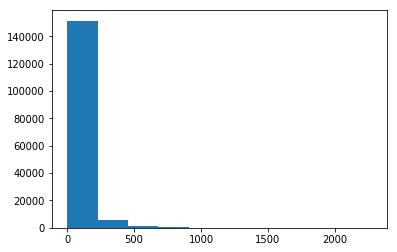

In [22]:
lens = []
for i in range(len(data)):
    lens.append(len(str(data['comment_text'][i]).split(' ')))
plt.hist(np.array(lens))

Longest comment: 2273 words


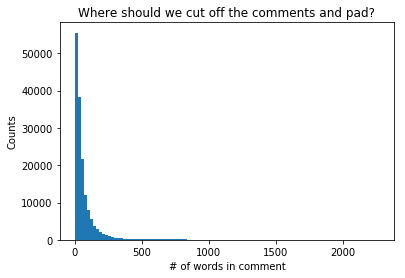

In [28]:
plt.hist(np.array(lens),bins=100);
plt.xlabel('# of words in comment')
plt.ylabel('Counts')
plt.title('Where should we cut off the comments and pad?')
print 'Longest comment:', np.max(lens), 'words'

In [16]:
data['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [117]:
reload(preprocess)
train_data = preprocess.load_data('../data/train.csv')[:2000]
inputs, masks = preprocess.tokenize_df(train_data, column='comment_text',target_length=100)
labels = preprocess.filter_labels(train_data, rnn_model.config['label_names'])

In [146]:
import rnn_model
reload(rnn_model)
import utils
reload(utils)

<module 'utils' from 'utils.pyc'>

In [113]:
tf.reset_default_graph()
rnn = rnn_model.RNNModel(config=rnn_model.config,emb_data=emb_data)

In [147]:
%%time

tf.reset_default_graph()
with tf.Graph().as_default() as graph:
    obj = rnn_model.RNNModel(config=rnn_model.config, emb_data=emb_data)
    init_op = tf.global_variables_initializer()
graph.finalize()

# Fit
with tf.Session(graph=graph) as sess:
    sess.run(init_op)
    list_loss = obj.train(sess, inputs, masks, labels)
    #y_score_train = obj.predict(sess, inputs)

CPU times: user 7min 15s, sys: 1min 19s, total: 8min 34s
Wall time: 2min 46s


In [86]:
emb_data = preprocess.get_glove(50)

  1%|          | 4036/400000 [00:00<00:09, 40341.86it/s]

Loading GLoVE vectors from file: ../data/glove/glove.6B.50d.txt


100%|██████████| 400000/400000 [00:08<00:00, 44457.08it/s]


In [144]:
import evaluate

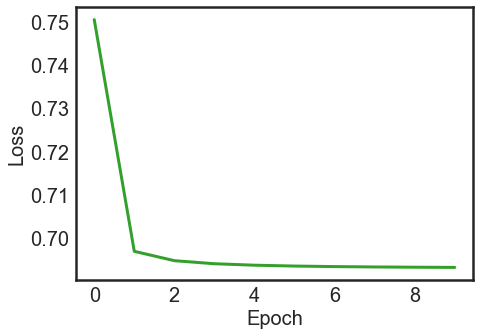

In [148]:
evaluate.plot_loss(list_loss)

In [164]:

config = {'exp_name': 'ff_l2_h30_f300',
          'label_names': ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'],
          'n_epochs': 10,  # number of iterations
          'n_features': 50,  # dimension of the inputs
          'n_labels': 6,  # number of labels to predict
          'n_layers': 1,  # number of hidden layers
          'hidden_sizes': [30],  # size of hidden layers; int or list of int
          'lr': .0005,  # learning rate
          'batch_size': 2000,  # number of training examples in each minibatch
          'activation': tf.nn.relu,
          'optimizer': tf.train.AdamOptimizer,
          'initializer': tf.contrib.layers.xavier_initializer(uniform=False)
          }

In [167]:
def predict_from_params(inputs, config, emb_data, path_to_noext_file)
    tf.reset_default_graph()
    with tf.Graph().as_default() as graph:
        obj = nn_model.FeedForwardNeuralNetwork(config=config, emb_data=emb_data)
        init_op = tf.global_variables_initializer()
        saver = tf.train.Saver()

        with tf.Session() as sess:
            sess.run(init_op)
            saver.restore(sess,path_to_noext_file)
            print 'restored'
            scores = obj.predict(sess,
                        inputs)
    return scores

INFO:tensorflow:Restoring parameters from ../experiments/out/ff_l2_h30_f300_debug
restored


In [168]:
scores

array([[0.46876815, 0.6783597 , 0.5325148 , 0.37633547, 0.550674  ,
        0.32604378],
       [0.4484121 , 0.6645723 , 0.4896151 , 0.3766033 , 0.5680934 ,
        0.35617536],
       [0.4933433 , 0.67744374, 0.554047  , 0.38259926, 0.54428524,
        0.30922568],
       ...,
       [0.5037694 , 0.6260504 , 0.66869396, 0.5143837 , 0.5112951 ,
        0.16490947],
       [0.5120245 , 0.6691051 , 0.58765656, 0.37458968, 0.5549236 ,
        0.29024473],
       [0.44173026, 0.6619383 , 0.45553064, 0.36442345, 0.5706123 ,
        0.40608656]], dtype=float32)